# Rejection Sampling

Rejection sampling, or "accept-reject Monte Carlo" is a Monte Carlo method used to generate obsrvations from distributions. As it is a Monte Carlo it can also be used for numerical integration.

## Example: Approximation of $\pi$

Enclose a quadrant of a circle of radius $1$ in a square of side length $1$. Then uniformly sample points inside the bounds of the square in Cartesian coordinates. If the point lies inside the circle quadrant record this information. At the ends of many throws the ratio of points inside the circle to all points thrown will approximate the ratio of the area of the cricle quadrant to the area of the square

$$
\frac{\text{points inside circle}}{\text{all points thrown}} \approx \frac{\text{area of circle quadrant}}{\text{area of square}} = \frac{\pi r^2}{4\, l^2} = \frac{\pi}{4},
$$

thus, an approximation of $\pi$ can be found to be

$$
\pi \approx 4 \cdot \frac{\text{points inside circle}}{\text{all points thrown}}.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def approximate_pi(n_throws=1000, draw=True):
    n_circle_points = 0

    x_coord = np.random.uniform(0, 1, n_throws)
    y_coord = np.random.uniform(0, 1, n_throws)

    circle_x = []
    circle_y = []
    outside_x = []
    outside_y = []
    
    for x,y in zip(x_coord, y_coord):
        radius = np.sqrt(x**2 + y**2)
        if 1 > radius:
            n_circle_points += 1
            circle_x.append(x)
            circle_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)
    
    approx_pi = 4 * (n_circle_points / n_throws)
    print('The approximation of pi after {} throws is: {}'.format(n_throws, approx_pi))
    
    if draw:
        plt.plot(circle_x, circle_y, 'ro')
        plt.plot(outside_x, outside_y, 'bo')
        plt.xlabel(r'$x$')
        plt.ylabel(r'$y$')
        plt.show()

The approximation of pi after 1000 throws is: 3.16


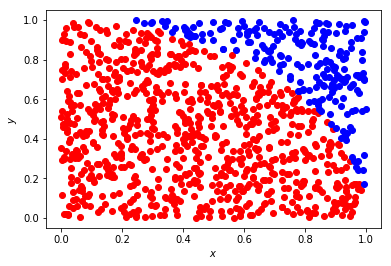

In [3]:
approximate_pi(1000)